In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cleaned = pd.read_csv(r"C:\Users\Lenovo\Downloads\insurance.csv")
cleaned.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [3]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [4]:
# no missing values found
cleaned.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
cleaned.describe()

age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000

## UNIVARIATE ANALYSIS

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


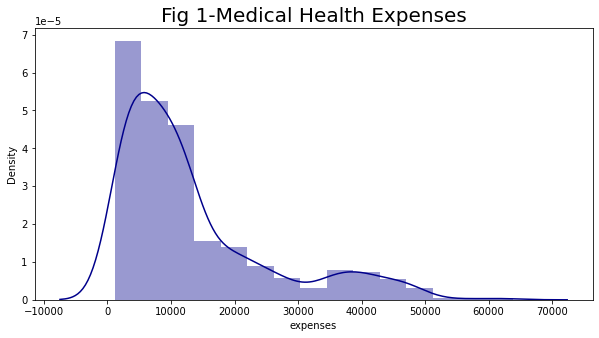

In [6]:
plt.figure(figsize=(10,5))
sns.distplot(cleaned['expenses'],bins=15,color='darkblue')
plt.title("Fig 1-Medical Health Expenses", fontsize=20)
plt.show()

In [7]:
minimum = min(cleaned['expenses'])
print("Minimum Value in expenses is:",minimum)

Minimum Value in expenses is: 1121.87


In [8]:
maximum = max(cleaned['expenses'])
print("Maximum Value in expenses is:",maximum)

Maximum Value in expenses is: 63770.43


In [9]:
def agee(X):
    if X in range(18,20):
        return '18-20'
    if X in range(20,30):
        return '20-30'
    if X in range(30,40):
        return '30-40'
    if X in range(40,50):
        return '40-50'
    elif X in range(50,60):
        return '50-60'
    else:
        return '60+'

In [10]:
cleaned['age_c']=cleaned['age'].apply(agee)

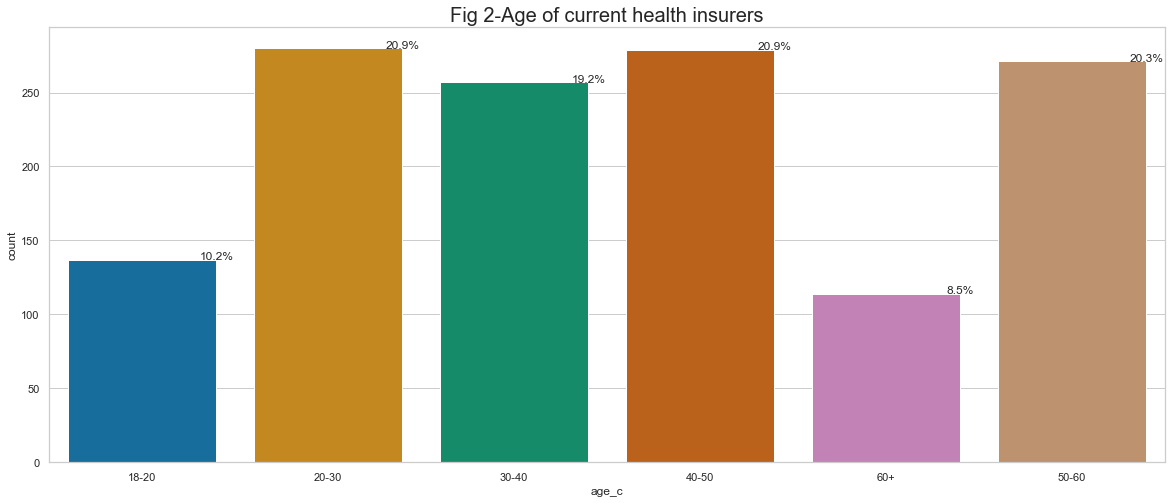

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
total = float(len(cleaned))
ax = sns.countplot(x="age_c", data=cleaned,palette="colorblind")
plt.title('Fig 2-Age of current health insurers', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()


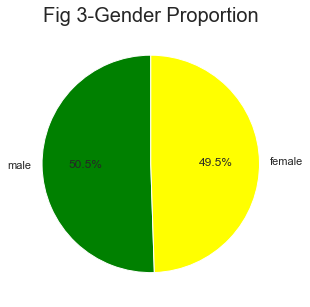

In [12]:
plt.figure(figsize=(18,5))
male = (cleaned["sex"] == "male").sum()
female = (cleaned["sex"]=="female").sum()
prop =[male,female]
plt.pie(prop,labels=["male","female"],shadow = False,colors= ['green','yellow'],startangle=90,autopct='%1.1f%%')
plt.title("Fig 3-Gender Proportion",fontsize=20)

plt.show()

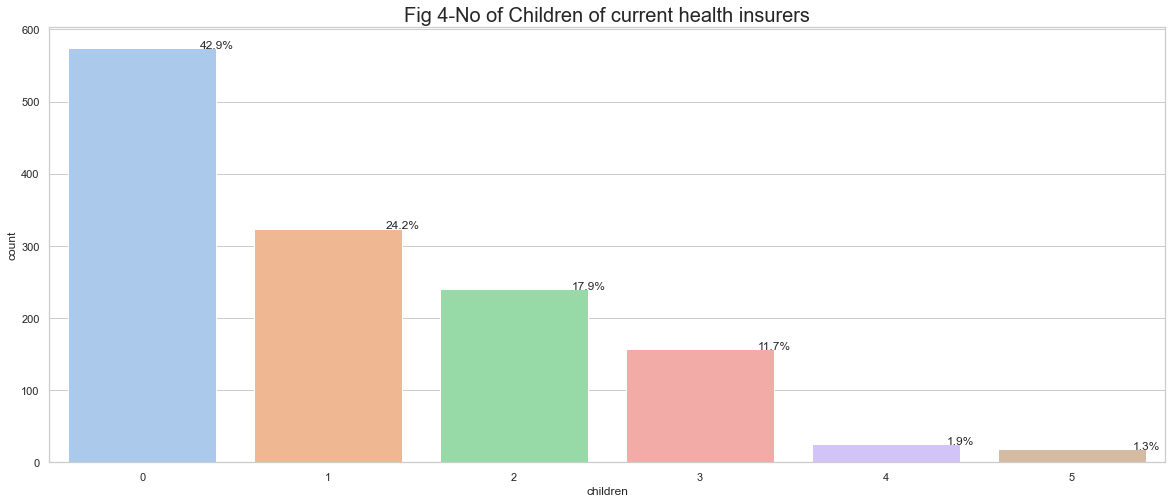

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
total = float(len(cleaned))
ax = sns.countplot(x="children", data=cleaned,palette="pastel")
plt.title('Fig 4-No of Children of current health insurers', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

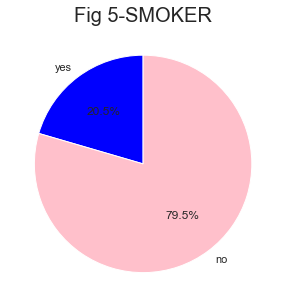

In [14]:
plt.figure(figsize=(18,5))
yes = (cleaned["smoker"] == "yes").sum()
no = (cleaned["smoker"]=="no").sum()
prop =[yes,no]
plt.pie(prop,labels=["yes","no"],shadow = False,colors= ['blue','pink'],startangle=90,autopct='%1.1f%%')
plt.title("Fig 5-SMOKER",fontsize=20)
plt.show()

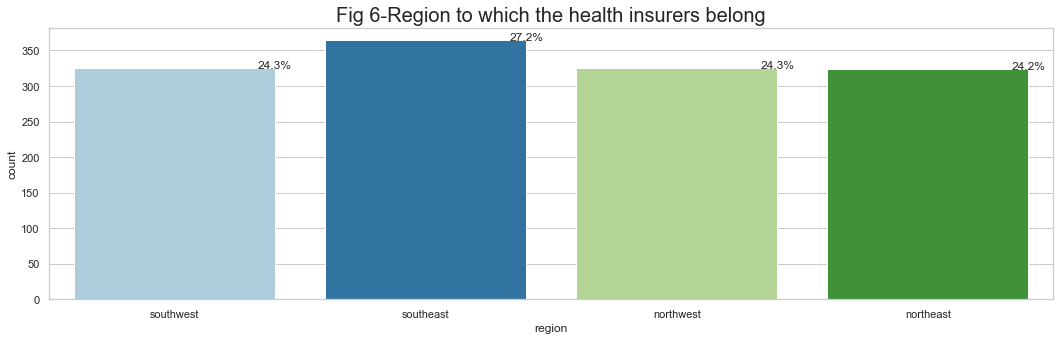

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(18,5))
total = float(len(cleaned))
ax = sns.countplot(x="region", data=cleaned,palette="Paired")
plt.title('Fig 6-Region to which the health insurers belong', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()


In [16]:
def BMI(BMI):
    if BMI<=18.5:
        return "UNDERWEIGHT"
    elif BMI<=24.9:
        return "NORMAL WEIGHT"
    elif BMI<=29.9:
        return "OVERWEIGHT"
    else:
        return "OBESE"

In [17]:
cleaned['BMI']=cleaned['bmi'].apply(BMI)

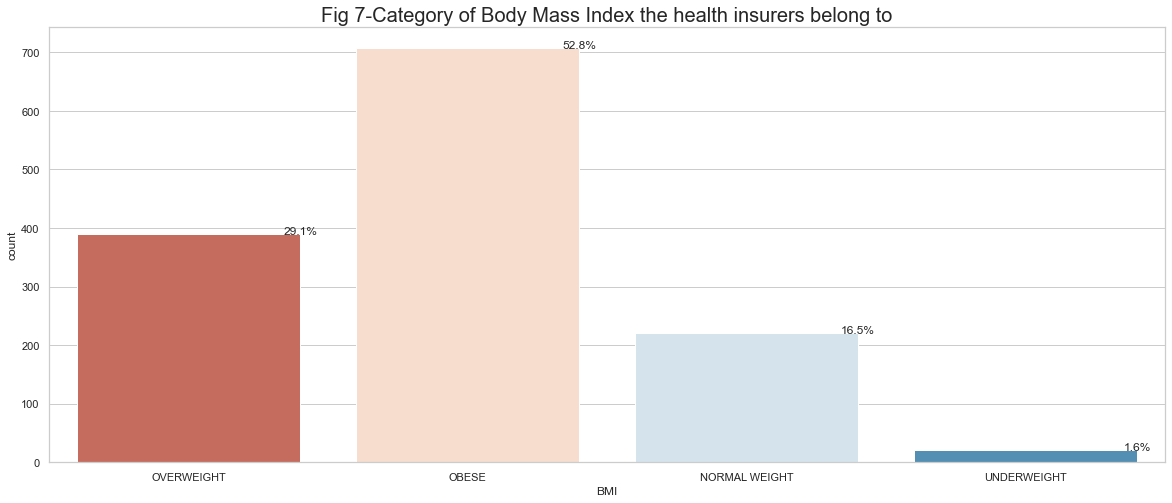

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
total = float(len(cleaned))
ax = sns.countplot(x ="BMI", data=cleaned,palette="RdBu")
plt.title("Fig 7-Category of Body Mass Index the health insurers belong to", fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## MULTIVARIATE ANALYSIS

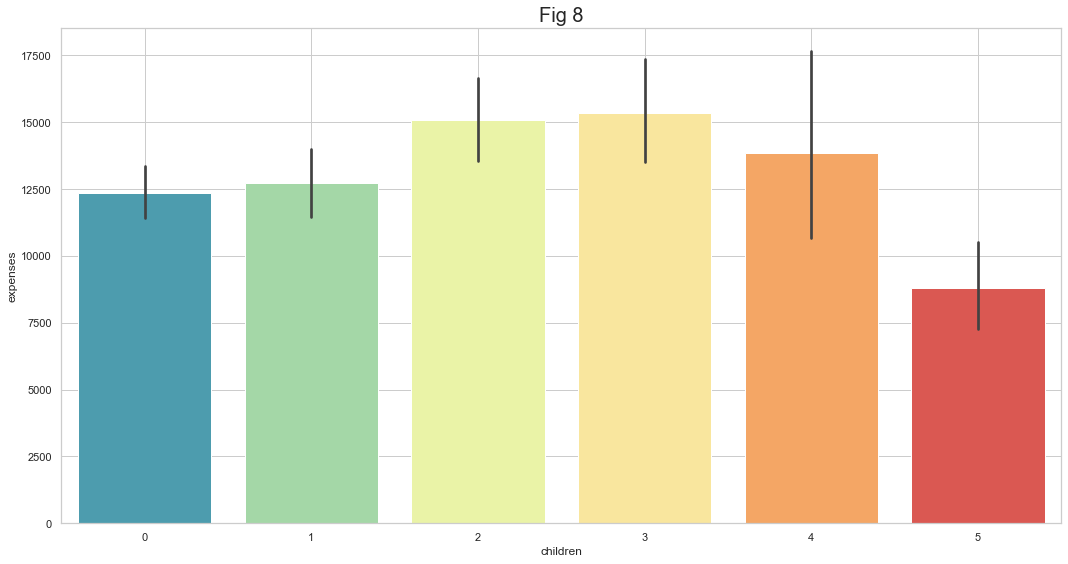

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x='children',y='expenses',data=cleaned,palette='Spectral_r',saturation=0.9)
plt.title("Fig 8", fontsize=20)
plt.tight_layout()
plt.grid(True)
plt.show()

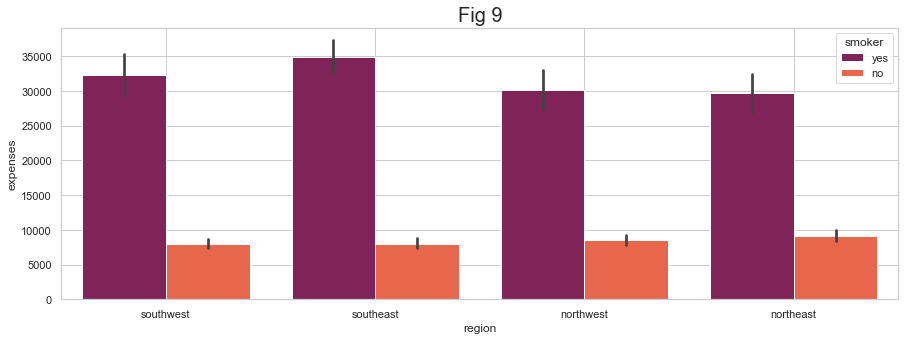

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='region',y='expenses',hue = "smoker",data=cleaned,saturation=0.9,palette="rocket")
plt.title("Fig 9", fontsize=20)
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Fig 10')

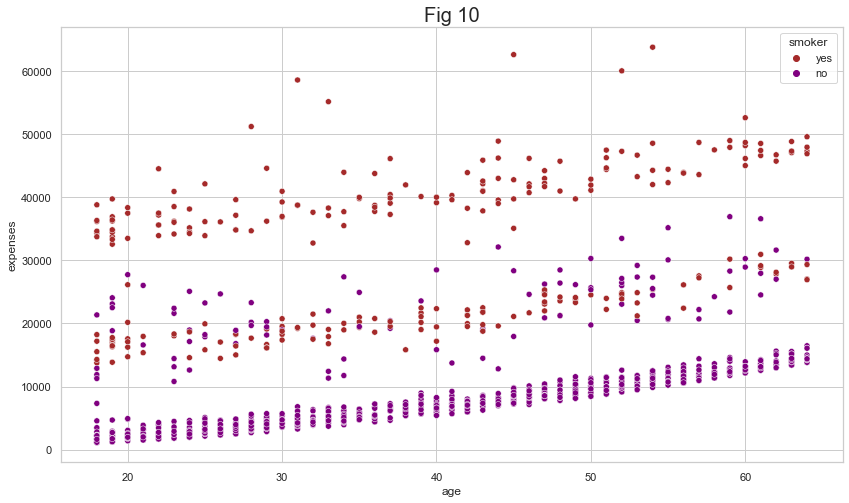

In [21]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=cleaned, x='age', y='expenses',hue="smoker",palette=['brown','purple'])
plt.title("Fig 10", fontsize=20)


Text(0.5, 1.0, 'Fig 11')

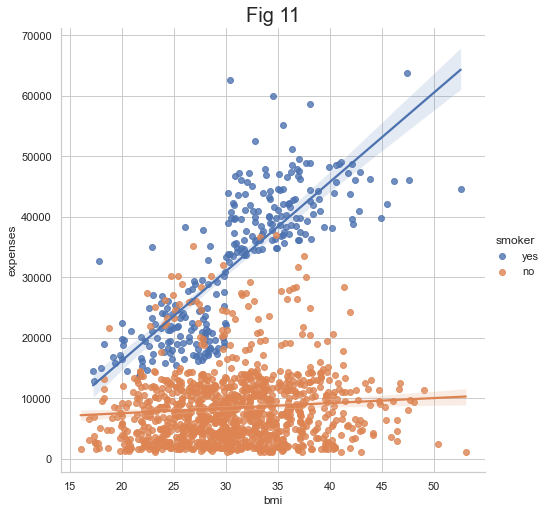

In [22]:
sns.lmplot(data=cleaned, x='bmi', y='expenses',hue="smoker",height = 7) 
plt.title("Fig 11", fontsize=20)


## Feature Engineering


In [23]:
#Here we have used Label encoder for the three varibales "sex","smoker","region" to assign values to these categorical variables, so that it is in machine readable form.
from sklearn.preprocessing import LabelEncoder


In [24]:
lbl_encode = LabelEncoder()
lbl_encode.fit_transform(cleaned['sex'])
cleaned['sex_label']= lbl_encode.fit_transform(cleaned['sex'])
cleaned['sex'].value_counts()


male      676
female    662
Name: sex, dtype: int64

In [25]:

cleaned['sex_label'].value_counts()

1    676
0    662
Name: sex_label, dtype: int64

In [26]:
lbl_encode.fit_transform(cleaned['smoker'])
cleaned['smoker_label']= lbl_encode.fit_transform(cleaned['smoker'])
cleaned['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [27]:
cleaned['smoker_label'].value_counts()

0    1064
1     274
Name: smoker_label, dtype: int64

In [28]:
lbl_encode.fit_transform(cleaned['region'])
cleaned['region_label']= lbl_encode.fit_transform(cleaned['region'])
cleaned['region'].value_counts()


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [29]:
cleaned['region_label'].value_counts()

2    364
3    325
1    325
0    324
Name: region_label, dtype: int64

In [30]:
#Dropping unnecessary columns.
k=cleaned.drop(["region","sex","age_c","BMI","smoker"],axis=1)
k.head()

age   bmi  children  expenses  sex_label  smoker_label  region_label
0   19  27.9         0  16884.92          0             1             3
1   18  33.8         1   1725.55          1             0             2
2   28  33.0         3   4449.46          1             0             2
3   33  22.7         0  21984.47          1             0             1
4   32  28.9         0   3866.86          1             0             1

<AxesSubplot:>

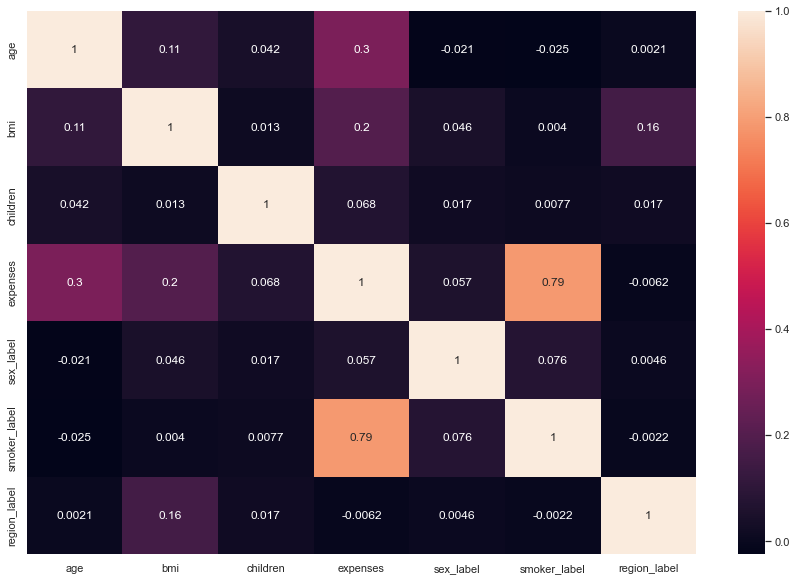

In [31]:
#Creating a heat map to check for correlation, where we can only see a positive relation between smokers and expenses at 79 per cent.
plt.figure(figsize=(15,10))
sns.heatmap(k.corr(),annot=True)

## Feature Scaling

In [32]:
#Segregating my independent & dependent variables
x = k.drop('expenses',axis=1)
y = k['expenses']
x.head()

age   bmi  children  sex_label  smoker_label  region_label
0   19  27.9         0          0             1             3
1   18  33.8         1          1             0             2
2   28  33.0         3          1             0             2
3   33  22.7         0          1             0             1
4   32  28.9         0          1             0             1

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in x.columns:
    x[i]=scaler.fit_transform(x[i].values.reshape(-1,1))

In [34]:
x.head()

age       bmi  children  sex_label  smoker_label  region_label
0 -1.438764 -0.453646 -0.908614  -1.010519      1.970587      1.343905
1 -1.509965  0.514186 -0.078767   0.989591     -0.507463      0.438495
2 -0.797954  0.382954  1.580926   0.989591     -0.507463      0.438495
3 -0.441948 -1.306650 -0.908614   0.989591     -0.507463     -0.466915
4 -0.513149 -0.289606 -0.908614   0.989591     -0.507463     -0.466915

## Spliting data into training and testing dataset

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [36]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [37]:
#importing necessary libraries
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [38]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
                                   


## Model Training & Testing using Hyperparamaterized tuning along with Grid search CV.

In [39]:
#Appending all the resuts of the models at the end for proper comparison.
Report=[]

## Linear Regression

In [40]:
l= LinearRegression()
l.fit(x_train,y_train)
y_train_pred= l.predict(x_train)
y_test_pred= l.predict(x_test)

train_r2Score=metrics.r2_score(y_train,y_train_pred)
test_r2Score=metrics.r2_score(y_test,y_test_pred)
print(train_r2Score)
print(test_r2Score)

Report.append({
        'Model': 'Linear Regression',
        'Training Accuracy': train_r2Score,
        'Testing Accuracy':test_r2Score,
    'MEAN_SQ_TRAIN':np.sqrt(mean_squared_error(y_train,y_train_pred)),
    'MEAN_ABS_TRAIN' : mean_absolute_error(y_train,y_train_pred),
    'MEAN_SQ_TEST' : np.sqrt(mean_squared_error(y_test,y_test_pred)),
    'MEAN_ABS_TEST': mean_absolute_error(y_test,y_test_pred),
     })

0.7368404516664875
0.7999053396503136


## Gradient Boosting Regressor

In [41]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)                                      
                         
param_grid = {
           'n_estimators':[10,20,30],
            'max_depth':[2,10,15],
            'min_samples_split':[2,6,10],
            'min_samples_leaf':[1,2,5],
             }

grid = GridSearchCV(estimator =GradientBoostingRegressor(),
                           param_grid=param_grid,
                           cv=kfold,
                           scoring=make_scorer(r2_score),
                           verbose=True,
                           n_jobs=-1)
                    

grid.fit(x_train,y_train)

y_train_pred= grid.predict(x_train)


y_test_pred= grid.predict(x_test)

train_r2Score=metrics.r2_score(y_train,y_train_pred)
test_r2Score=metrics.r2_score(y_test,y_test_pred)
print(train_r2Score)
print(test_r2Score)

Report.append({
        'Model': 'Gradient Boosting Regressor',
        'Training Accuracy': train_r2Score,
        'Testing Accuracy':test_r2Score,
    'MEAN_SQ_TRAIN':np.sqrt(mean_squared_error(y_train,y_train_pred)),
    'MEAN_ABS_TRAIN' : mean_absolute_error(y_train,y_train_pred),
    'MEAN_SQ_TEST' : np.sqrt(mean_squared_error(y_test,y_test_pred)),
    'MEAN_ABS_TEST': mean_absolute_error(y_test,y_test_pred),
     })

Fitting 5 folds for each of 81 candidates, totalling 405 fits
0.8472830084443616
0.8884534073230537


## Random Forest Regressor 

In [42]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)     
param_grid = {
           'n_estimators':[10,20,30],
           'max_depth':[2,5,10,15],
           'min_samples_split':[2,5,7,10,15,20,25],
           'min_samples_leaf':[1,2,4,6,8,10],
             }

grid = GridSearchCV(estimator =RandomForestRegressor(),
                           param_grid=param_grid,
                           cv=kfold,
                           scoring=make_scorer(r2_score),
                           verbose=True,
                           n_jobs=-1)

grid.fit(x_train,y_train)
y_train_pred= grid.predict(x_train)


y_test_pred= grid.predict(x_test)

train_r2Score=metrics.r2_score(y_train,y_train_pred)
test_r2Score=metrics.r2_score(y_test,y_test_pred)
print(train_r2Score)
print(test_r2Score)

Report.append({
        'Model': 'Random Forest Regressor',
        'Training Accuracy': train_r2Score,
        'Testing Accuracy':test_r2Score,
    'MEAN_SQ_TRAIN':np.sqrt(mean_squared_error(y_train,y_train_pred)),
    'MEAN_ABS_TRAIN' : mean_absolute_error(y_train,y_train_pred),
    'MEAN_SQ_TEST' : np.sqrt(mean_squared_error(y_test,y_test_pred)),
    'MEAN_ABS_TEST': mean_absolute_error(y_test,y_test_pred),
     })

Fitting 5 folds for each of 504 candidates, totalling 2520 fits
0.8818765438911009
0.8992255384828602


## Decision Tree Regressor

In [43]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)                                         

param_grid = {
          'min_samples_split': [5,10,15],
          'max_depth': [2,6,10],
             }

grid = GridSearchCV(estimator =DecisionTreeRegressor(),
                           param_grid=param_grid,
                           cv=kfold,
                           scoring=make_scorer(r2_score),
                           verbose=True,
                           n_jobs=-1)

grid.fit(x_train,y_train)
y_train_pred= grid.predict(x_train)


y_test_pred= grid.predict(x_test)

train_r2Score=metrics.r2_score(y_train,y_train_pred)
test_r2Score=metrics.r2_score(y_test,y_test_pred)
print(train_r2Score)
print(test_r2Score)

Report.append({
        'Model': 'Decision Tree Regressor',
        'Training Accuracy': train_r2Score,
        'Testing Accuracy':test_r2Score,
    'MEAN_SQ_TRAIN':np.sqrt(mean_squared_error(y_train,y_train_pred)),
    'MEAN_ABS_TRAIN' : mean_absolute_error(y_train,y_train_pred),
    'MEAN_SQ_TEST' : np.sqrt(mean_squared_error(y_test,y_test_pred)),
    'MEAN_ABS_TEST': mean_absolute_error(y_test,y_test_pred),
     })

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8170558490910984
0.855366697593515


## KNeighbors Regressor

In [44]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)     
param_grid = {
           'n_neighbors':list(range(2,20,2)),
           'weights':['uniform', 'distance'],
            'p':[1,2],
             }

grid = GridSearchCV(estimator =KNeighborsRegressor(),
                           param_grid=param_grid,
                           cv=kfold,
                           scoring=make_scorer(r2_score),
                           verbose=True,
                           n_jobs=-1)

grid.fit(x_train,y_train)
y_train_pred= grid.predict(x_train)


y_test_pred= grid.predict(x_test)

train_r2Score=metrics.r2_score(y_train,y_train_pred)
test_r2Score=metrics.r2_score(y_test,y_test_pred)
print(train_r2Score)
print(test_r2Score)

Report.append({
        'Model': 'KNeighbors Regressor',
        'Training Accuracy': train_r2Score,
        'Testing Accuracy':test_r2Score,
    'MEAN_SQ_TRAIN':np.sqrt(mean_squared_error(y_train,y_train_pred)),
    'MEAN_ABS_TRAIN' : mean_absolute_error(y_train,y_train_pred),
    'MEAN_SQ_TEST' : np.sqrt(mean_squared_error(y_test,y_test_pred)),
    'MEAN_ABS_TEST': mean_absolute_error(y_test,y_test_pred),
     })

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.8512666244586427
0.8600127081741222


## COMPARISON OF THE MODELS

In [45]:
Report= pd.DataFrame(Report,columns=['Model','Training Accuracy','Testing Accuracy','MEAN_SQ_TRAIN','MEAN_SQ_TEST','MEAN_ABS_TRAIN','MEAN_ABS_TEST'])
Report.sort_values('Testing Accuracy',ascending=False,inplace=True)
Report

Model  Training Accuracy  Testing Accuracy  \
2      Random Forest Regressor           0.881877          0.899226   
1  Gradient Boosting Regressor           0.847283          0.888453   
4         KNeighbors Regressor           0.851267          0.860013   
3      Decision Tree Regressor           0.817056          0.855367   
0            Linear Regression           0.736840          0.799905   

   MEAN_SQ_TRAIN  MEAN_SQ_TEST  MEAN_ABS_TRAIN  MEAN_ABS_TEST  
2    4115.204147   4004.526979     2262.708908    2409.807611  
1    4679.150262   4213.122970     2827.608406    2736.084904  
4    4617.719294   4719.764037     2773.137477    3084.692668  
3    5121.327821   4797.446410     3362.810780    3248.479594  
0    6142.326219   5642.787954     4235.110545    3930.217375

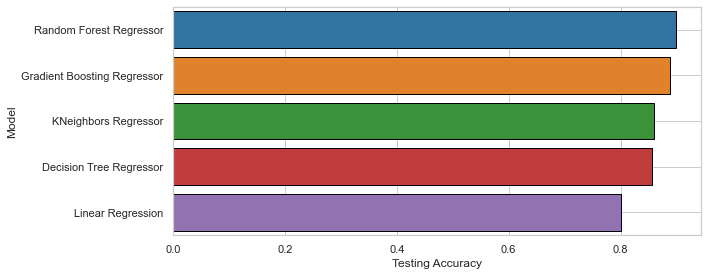

In [46]:
plt.figure(figsize=(10,4))
sns.barplot(y=Report['Model'],x=Report['Testing Accuracy'],palette='tab10',edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

## We can see that the model Random Forest regressor has the highest test accuracy of 90 per cent , with Mean Square Error of 3957.90 and Mean Absolute Error of 2403.23

## Thus we can use this model to help people predict their medical expenses according to their individual health situation.




